# Data Aggregation and Group Operations

In [240]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [241]:
pd.options.display.notebook_repr_html = False

In [242]:
%matplotlib inline

## GroupBy mechanics

In [4]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,-0.204708,1.393406,a,one
1,0.478943,0.092908,a,two
2,-0.519439,0.281746,b,one
3,-0.555730,0.769023,b,two
4,1.965781,1.246435,a,one


In [5]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [6]:
grouped.mean()

key1
a    0.746672
b   -0.537585
Name: data1, dtype: float64

In [7]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.880536
      two     0.478943
b     one    -0.519439
      two    -0.555730
Name: data1, dtype: float64

In [8]:
means.unstack()

key2,one,two
key1,,
a,0.880536,0.478943
b,-0.519439,-0.555730


In [9]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    0.478943
            2006   -0.519439
Ohio        2005   -0.380219
            2006    1.965781
Name: data1, dtype: float64

In [10]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.746672,0.910916
b,-0.537585,0.525384


In [11]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.880536  1.319920
     two   0.478943  0.092908
b    one  -0.519439  0.281746
     two  -0.555730  0.769023

In [12]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Iterating over groups

In [14]:
df.groupby('key1')

In [16]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
4  1.965781  1.246435    a  one
b
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two


In [17]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
4  1.965781  1.246435    a  one
('a', 'two')
      data1     data2 key1 key2
1  0.478943  0.092908    a  two
('b', 'one')
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
('b', 'two')
     data1     data2 key1 key2
3 -0.55573  0.769023    b  two


In [18]:
list(df.groupby('key1'))

[('a',       data1     data2 key1 key2
  0 -0.204708  1.393406    a  one
  1  0.478943  0.092908    a  two
  4  1.965781  1.246435    a  one), ('b',       data1     data2 key1 key2
  2 -0.519439  0.281746    b  one
  3 -0.555730  0.769023    b  two)]

In [19]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,data1,data2,key1,key2
2,-0.519439,0.281746,b,one
3,-0.555730,0.769023,b,two


In [20]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [21]:
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

{dtype('float64'):       data1     data2
 0 -0.204708  1.393406
 1  0.478943  0.092908
 2 -0.519439  0.281746
 3 -0.555730  0.769023
 4  1.965781  1.246435, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

### Selecting a column or subset of columns

In [24]:
df

,data1,data2,key1,key2
0,-0.204708,1.393406,a,one
1,0.478943,0.092908,a,two
2,-0.519439,0.281746,b,one
3,-0.555730,0.769023,b,two
4,1.965781,1.246435,a,one


In [42]:
df['data1'].groupby(df['key1'])

In [43]:
df.groupby('key1')[['data2']]

In [55]:
type(df[['data2']])

pandas.core.frame.DataFrame

In [59]:
df.groupby(['key1', 'key2'])['data2'].mean()

key1  key2
a     one     1.319920
      two     0.092908
b     one     0.281746
      two     0.769023
Name: data2, dtype: float64

In [64]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [65]:
s_grouped.mean()

key1  key2
a     one     1.319920
      two     0.092908
b     one     0.281746
      two     0.769023
Name: data2, dtype: float64

### Grouping with dicts and Series

In [66]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.ix[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,1.007189,-1.296221,0.274992,0.228913,1.352917
Steve,0.886429,-2.001637,-0.371843,1.669025,-0.438570
Wes,-0.539741,NaN,NaN,-1.021228,-0.577087
Jim,0.124121,0.302614,0.523772,0.000940,1.343810
Travis,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757


In [68]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [69]:
mapping

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [76]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,0.503905,1.063885
Steve,1.297183,-1.553778
Wes,-1.021228,-1.116829
Jim,0.524712,1.770545
Travis,-4.230992,-2.405455


In [82]:
by_column.mean()

,blue,red
Joe,0.251952,0.354628
Steve,0.648591,-0.517926
Wes,-1.021228,-0.558414
Jim,0.262356,0.590182
Travis,-2.115496,-0.801818


In [83]:
by_column.count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [80]:
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [81]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### Grouping with functions

In [84]:
people

,a,b,c,d,e
Joe,1.007189,-1.296221,0.274992,0.228913,1.352917
Steve,0.886429,-2.001637,-0.371843,1.669025,-0.438570
Wes,-0.539741,NaN,NaN,-1.021228,-0.577087
Jim,0.124121,0.302614,0.523772,0.000940,1.343810
Travis,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757


In [85]:
people.groupby(len).sum()

,a,b,c,d,e
3,0.591569,-0.993608,0.798764,-0.791374,2.119639
5,0.886429,-2.001637,-0.371843,1.669025,-0.438570
6,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757


In [86]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.539741 -1.296221  0.274992 -1.021228 -0.577087
  two  0.124121  0.302614  0.523772  0.000940  1.343810
5 one  0.886429 -2.001637 -0.371843  1.669025 -0.438570
6 two -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

### Grouping by index levels

In [88]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
columns

MultiIndex(levels=[[u'JP', u'US'], [1, 3, 5]],
           labels=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=[u'cty', u'tenor'])

In [89]:
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.560145 -1.265934  0.119827 -1.063512  0.332883
1     -2.359419 -0.199543 -1.541996 -0.970736 -1.307030
2      0.286350  0.377984 -0.753887  0.331286  1.349742
3      0.069877  0.246674 -0.011862  1.004812  1.327195

In [91]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [92]:
hier_df.groupby(level='tenor', axis=1).count()

tenor,1,3,5
0,2,2,1
1,2,2,1
2,2,2,1
3,2,2,1


## Data aggregation

In [93]:
df

,data1,data2,key1,key2
0,-0.204708,1.393406,a,one
1,0.478943,0.092908,a,two
2,-0.519439,0.281746,b,one
3,-0.555730,0.769023,b,two
4,1.965781,1.246435,a,one


In [140]:
grouped = df.groupby('key1')


In [146]:
grouped['data1'].count()

key1
a    3
b    2
Name: data1, dtype: int64

In [141]:
grouped['data1'].quantile(0.9)

key1
a    1.668413
b   -0.523068
Name: data1, dtype: float64

In [150]:
grouped['data1'].describe()

key1       
a     count    3.000000
      mean     0.746672
      std      1.109736
      min     -0.204708
      25%      0.137118
      50%      0.478943
      75%      1.222362
      max      1.965781
b     count    2.000000
      mean    -0.537585
      std      0.025662
      min     -0.555730
      25%     -0.546657
      50%     -0.537585
      75%     -0.528512
      max     -0.519439
dtype: float64

In [148]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,2.170488,1.300498
b,0.036292,0.487276


In [149]:
grouped.describe()

data1     data2
key1                          
a    count  3.000000  3.000000
     mean   0.746672  0.910916
     std    1.109736  0.712217
     min   -0.204708  0.092908
     25%    0.137118  0.669671
     50%    0.478943  1.246435
     75%    1.222362  1.319920
     max    1.965781  1.393406
b    count  2.000000  2.000000
     mean  -0.537585  0.525384
     std    0.025662  0.344556
     min   -0.555730  0.281746
     25%   -0.546657  0.403565
     50%   -0.537585  0.525384
     75%   -0.528512  0.647203
     max   -0.519439  0.769023

In [152]:
tips = pd.read_csv('ch08/tips.csv')


In [153]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [154]:
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


### Column-wise and multiple function application

In [160]:
grouped = tips.groupby(['sex', 'smoker'])

In [162]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [163]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [164]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [169]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [175]:
result['tip_pct']

count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [176]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

In [194]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [195]:
test = grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})
test

tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

### Returning aggregated data in "unindexed" form

In [226]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()


,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


In [227]:
tips.groupby(['sex', 'smoker']).mean()

total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771

## Group-wise operations and transformations

In [228]:
df

,data1,data2,key1,key2
0,-0.204708,1.393406,a,one
1,0.478943,0.092908,a,two
2,-0.519439,0.281746,b,one
3,-0.555730,0.769023,b,two
4,1.965781,1.246435,a,one


In [229]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

,mean_data1,mean_data2
key1,,
a,0.746672,0.910916
b,-0.537585,0.525384


In [231]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,-0.204708,1.393406,a,one,0.746672,0.910916
1,0.478943,0.092908,a,two,0.746672,0.910916
4,1.965781,1.246435,a,one,0.746672,0.910916
2,-0.519439,0.281746,b,one,-0.537585,0.525384
3,-0.555730,0.769023,b,two,-0.537585,0.525384


In [232]:
people

,a,b,c,d,e
Joe,1.007189,-1.296221,0.274992,0.228913,1.352917
Steve,0.886429,-2.001637,-0.371843,1.669025,-0.438570
Wes,-0.539741,NaN,NaN,-1.021228,-0.577087
Jim,0.124121,0.302614,0.523772,0.000940,1.343810
Travis,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757


In [235]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

,a,b,c,d,e
one,-0.082032,-1.063687,-1.047620,-0.884358,-0.028309
two,0.505275,-0.849512,0.075965,0.834983,0.452620


In [236]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,-0.082032,-1.063687,-1.047620,-0.884358,-0.028309
Steve,0.505275,-0.849512,0.075965,0.834983,0.452620
Wes,-0.082032,-1.063687,-1.047620,-0.884358,-0.028309
Jim,0.505275,-0.849512,0.075965,0.834983,0.452620
Travis,-0.082032,-1.063687,-1.047620,-0.884358,-0.028309


In [246]:
def demean(arr):
    return arr - arr.mean()
demeaned = people.groupby(key).transform(demean)
demeaned

               a         b         c         d         e
Joe     1.089221 -0.232534  1.322612  1.113271  1.381226
Steve   0.381154 -1.152125 -0.447807  0.834043 -0.891190
Wes    -0.457709       NaN       NaN -0.136869 -0.548778
Jim    -0.381154  1.152125  0.447807 -0.834043  0.891190
Travis -0.631512  0.232534 -1.322612 -0.976402 -0.832448

In [244]:
demeaned.groupby(key).mean()

                a             b    c             d    e
one  0.000000e+00 -1.110223e-16  0.0  7.401487e-17  0.0
two -2.775558e-17  0.000000e+00  0.0  0.000000e+00  0.0

### Apply: General split-apply-combine

In [252]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

     total_bill   tip     sex smoker  day    time  size   tip_pct
109       14.31  4.00  Female    Yes  Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes  Sun  Dinner     4  0.280535
232       11.61  3.39    Male     No  Sat  Dinner     2  0.291990
67         3.07  1.00  Female    Yes  Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes  Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes  Sun  Dinner     2  0.710345

In [254]:
tips

     total_bill   tip     sex smoker   day    time  size   tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
5         25.29  4.71    Male     No   Sun  Dinner     4  0.186240
6          8.77  2.00    Male     No   Sun  Dinner     2  0.228050
7         26.88  3.12    Male     No   Sun  Dinner     4  0.116071
8         15.04  1.96    Male     No   Sun  Dinner     2  0.130319
9         14.78  3.23    Male     No   Sun  Dinner     2  0.218539
10        10.27  1.71    Male     No   Sun  Dinner     2  0.166504
11        35.26  5.00  Female     No   Sun  Dinner     4  0.141804
12        15.42  1.57    Male     No   Sun  Dinner     2  0.101816
13        18.43  3.00    Male     No   Sun  Dinner     4  0.16

In [255]:
tips.groupby('smoker').mean()

        total_bill       tip      size   tip_pct
smoker                                          
No       19.188278  2.991854  2.668874  0.159328
Yes      20.756344  3.008710  2.408602  0.163196

In [249]:
tips.groupby('smoker').apply(top)

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [256]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  

In [257]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

smoker       
No      count    151.000000
        mean       0.159328
        std        0.039910
        min        0.056797
        25%        0.136906
        50%        0.155625
        75%        0.185014
        max        0.291990
Yes     count     93.000000
        mean       0.163196
        std        0.085119
        min        0.035638
        25%        0.106771
        50%        0.153846
        75%        0.195059
        max        0.710345
dtype: float64

In [258]:
result.unstack('smoker')

smoker          No        Yes
count   151.000000  93.000000
mean      0.159328   0.163196
std       0.039910   0.085119
min       0.056797   0.035638
25%       0.136906   0.106771
50%       0.155625   0.153846
75%       0.185014   0.195059
max       0.291990   0.710345

In [261]:
f = lambda x: x.describe()
tips.groupby('smoker').apply(f)

              total_bill         tip        size     tip_pct
smoker                                                      
No     count  151.000000  151.000000  151.000000  151.000000
       mean    19.188278    2.991854    2.668874    0.159328
       std      8.255582    1.377190    1.017984    0.039910
       min      7.250000    1.000000    1.000000    0.056797
       25%     13.325000    2.000000    2.000000    0.136906
       50%     17.590000    2.740000    2.000000    0.155625
       75%     22.755000    3.505000    3.000000    0.185014
       max     48.330000    9.000000    6.000000    0.291990
Yes    count   93.000000   93.000000   93.000000   93.000000
       mean    20.756344    3.008710    2.408602    0.163196
       std      9.832154    1.401468    0.810751    0.085119
       min      3.070000    1.000000    1.000000    0.035638
       25%     13.420000    2.000000    2.000000    0.106771
       50%     17.920000    3.000000    2.000000    0.153846
       75%     26.860000

#### Suppressing the group keys

In [268]:
tips.groupby('smoker', group_keys=False).apply(top)

     total_bill   tip     sex smoker   day    time  size   tip_pct
88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [267]:
tips.groupby('smoker').apply(top)

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

### Quantile and bucket analysis

In [273]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})

In [276]:
frame

        data1     data2
0    1.040960  0.982652
1    0.615507  1.988347
2   -0.212099 -1.436851
3   -0.047085  0.101126
4    0.008921  0.800088
5    1.351335 -1.772025
6   -0.776652  0.946931
7   -0.022289 -0.568729
8   -0.232862  1.615517
9   -0.930217 -0.742938
10   1.890817  0.479171
11   1.714924 -0.441436
12   0.310738  0.086430
13   0.151633  2.537957
14   1.386715  1.218441
15  -0.751649  0.281651
16   0.847988  0.113591
17  -0.297775 -1.186976
18   0.277543 -1.005236
19  -0.374239  0.647172
20  -0.209514  0.155881
21  -0.726778 -0.611048
22   0.913554 -0.761607
23  -1.680051  0.833188
24  -1.057537 -0.889180
25   0.226694 -1.390448
26   0.812692  0.370920
27  -1.842504 -1.205777
28   1.702282  0.020619
29  -1.788051  0.886586
..        ...       ...
970  0.111875  0.473763
971 -1.108564 -0.449137
972 -0.651635  0.431927
973  0.134718 -1.241627
974 -0.763158  0.412366
975  1.047723  0.617599
976 -1.491644 -0.843849
977  0.335024  3.189940
978  0.991252  0.070978
979 -0.196114  0

In [278]:
factor = pd.cut(frame.data1, 4)
factor.value_counts()

(-0.117, 1.422]     480
(-1.656, -0.117]    402
(1.422, 2.961]       70
(-3.201, -1.656]     48
dtype: int64

In [279]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [283]:
grouped = frame.data2.groupby(factor)
grouped

In [284]:
grouped.apply(get_stats)

data1                  
(-3.201, -1.656]  count     48.000000
                  max        1.562211
                  mean      -0.048732
                  min       -1.614189
(-1.656, -0.117]  count    402.000000
                  max        3.082067
                  mean      -0.009808
                  min       -3.481593
(-0.117, 1.422]   count    480.000000
                  max        3.189940
                  mean      -0.009706
                  min       -2.731556
(1.422, 2.961]    count     70.000000
                  max        1.505806
                  mean      -0.075974
                  min       -2.246992
dtype: float64

In [285]:
grouped.apply(get_stats).unstack()
#ADAPT the output is not sorted in the book while this is the case now (swap first two lines)

                  count       max      mean       min
data1                                                
(-3.201, -1.656]   48.0  1.562211 -0.048732 -1.614189
(-1.656, -0.117]  402.0  3.082067 -0.009808 -3.481593
(-0.117, 1.422]   480.0  3.189940 -0.009706 -2.731556
(1.422, 2.961]     70.0  1.505806 -0.075974 -2.246992

In [288]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)

grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

       count       max      mean       min
data1                                     
0      100.0  2.873075 -0.138283 -2.452923
1      100.0  3.082067 -0.035342 -3.481593
2      100.0  3.023720  0.077423 -2.742224
3      100.0  2.219406  0.121919 -2.463024
4      100.0  2.859053 -0.114156 -2.527985
5      100.0  2.537957  0.101664 -2.496635
6      100.0  3.189940 -0.066233 -2.731556
7      100.0  2.550369 -0.002734 -2.398718
8      100.0  2.395190 -0.108937 -2.200422
9      100.0  2.082424  0.002088 -2.246992

### Example: Filling missing values with group-specific values

In [289]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1   -0.075264
2         NaN
3    0.166874
4         NaN
5    0.815313
dtype: float64

In [290]:
s.fillna(s.mean())

0    0.302308
1   -0.075264
2    0.302308
3    0.166874
4    0.302308
5    0.815313
dtype: float64

In [291]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio         -0.732001
New York      0.868791
Vermont            NaN
Florida       0.485218
Oregon        0.161056
Nevada             NaN
California    1.190359
Idaho              NaN
dtype: float64

In [292]:
data.groupby(group_key).mean()

East    0.207336
West    0.675707
dtype: float64

In [293]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -0.732001
New York      0.868791
Vermont       0.207336
Florida       0.485218
Oregon        0.161056
Nevada        0.675707
California    1.190359
Idaho         0.675707
dtype: float64

In [299]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio         -0.732001
New York      0.868791
Vermont       0.500000
Florida       0.485218
Oregon        0.161056
Nevada       -1.000000
California    1.190359
Idaho        -1.000000
dtype: float64

### Example: Random sampling and permutation

In [335]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (range(1, 11) + [10] * 3) * 4
base_names = ['A'] + range(2, 11) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)

In [341]:
suits = ['H', 'S', 'C', 'D']
base_names = ['A'] + range(2, 11) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.append(str(num) + suit for num in base_names)

In [346]:
for card in cards:
    for c in card:
        print c

AD
2D
3D
4D
5D
6D
7D
8D
9D
10D
JD
KD
QD
AD
2D
3D
4D
5D
6D
7D
8D
9D
10D
JD
KD
QD
AD
2D
3D
4D
5D
6D
7D
8D
9D
10D
JD
KD
QD
AD
2D
3D
4D
5D
6D
7D
8D
9D
10D
JD
KD
QD


In [338]:
cards=[]
cards.extend(['AH'])
cards.extend('BH')
cards

['AH', 'B', 'H']

In [328]:
cards

['AH',
 '2H',
 '3H',
 '4H',
 '5H',
 '6H',
 '7H',
 '8H',
 '9H',
 '10H',
 'JH',
 'KH',
 'QH',
 'AS',
 '2S',
 '3S',
 '4S',
 '5S',
 '6S',
 '7S',
 '8S',
 '9S',
 '10S',
 'JS',
 'KS',
 'QS',
 'AC',
 '2C',
 '3C',
 '4C',
 '5C',
 '6C',
 '7C',
 '8C',
 '9C',
 '10C',
 'JC',
 'KC',
 'QC',
 'AD',
 '2D',
 '3D',
 '4D',
 '5D',
 '6D',
 '7D',
 '8D',
 '9D',
 '10D',
 'JD',
 'KD',
 'QD',
 'A',
 'H',
 'AH']

In [315]:
cards = []
cards.append('a')
cards.append('b')
cards


['a', 'b']

In [353]:
cards = []
cards.extend(['a'])
cards.extend([['b']])
cards.append('A'+'H')
cards

['a', ['b'], 'AH']

In [304]:
card_val    

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10]

In [305]:
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']

In [301]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [363]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
draw(deck)

7H     7
9D     9
QH    10
AH     1
3H     3
dtype: int64

In [364]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

C  7C      7
   2C      2
D  4D      4
   10D    10
H  5H      5
   10H    10
S  2S      2
   JS     10
dtype: int64

In [365]:
# alternatively
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

AC     1
9C     9
3D     3
8D     8
9H     9
JH    10
JS    10
4S     4
dtype: int64

### Example: Group weighted average and correlation

In [366]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
df

  category      data   weights
0        a  0.240901  0.581522
1        a  0.068146  0.748211
2        a -1.164410  0.115035
3        a -0.508308  0.992473
4        b  0.765083  0.410088
5        b  0.669133  0.979665
6        b  0.070989  0.819532
7        b -0.010290  0.033560

In [367]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a   -0.183549
b    0.457950
dtype: float64

In [376]:
close_px = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [370]:
close_px

              AAPL   MSFT    XOM      SPX
2003-01-02    7.40  21.11  29.22   909.03
2003-01-03    7.45  21.14  29.24   908.59
2003-01-06    7.45  21.52  29.96   929.01
2003-01-07    7.43  21.93  28.95   922.93
2003-01-08    7.28  21.31  28.83   909.93
2003-01-09    7.34  21.93  29.44   927.57
2003-01-10    7.36  21.97  29.03   927.57
2003-01-13    7.32  22.16  28.91   926.26
2003-01-14    7.30  22.39  29.17   931.66
2003-01-15    7.22  22.11  28.77   918.22
2003-01-16    7.31  21.75  28.90   914.60
2003-01-17    7.05  20.22  28.60   901.78
2003-01-21    7.01  20.17  27.94   887.62
2003-01-22    6.94  20.04  27.58   878.36
2003-01-23    7.09  20.54  27.52   887.34
2003-01-24    6.90  19.59  26.93   861.40
2003-01-27    7.07  19.32  26.21   847.48
2003-01-28    7.29  19.18  26.90   858.54
2003-01-29    7.47  19.61  27.88   864.36
2003-01-30    7.16  18.95  27.37   844.61
2003-01-31    7.18  18.65  28.13   855.70
2003-02-03    7.33  19.08  28.52   860.32
2003-02-04    7.30  18.59  28.52  

In [377]:
close_px[-4:]

              AAPL   MSFT    XOM      SPX
2011-10-11  400.29  27.00  76.27  1195.54
2011-10-12  402.19  26.96  77.16  1207.25
2011-10-13  408.43  27.18  76.37  1203.66
2011-10-14  422.00  27.27  78.11  1224.58

In [378]:
close_px.pct_change()

                AAPL      MSFT       XOM       SPX
2003-01-02       NaN       NaN       NaN       NaN
2003-01-03  0.006757  0.001421  0.000684 -0.000484
2003-01-06  0.000000  0.017975  0.024624  0.022474
2003-01-07 -0.002685  0.019052 -0.033712 -0.006545
2003-01-08 -0.020188 -0.028272 -0.004145 -0.014086
2003-01-09  0.008242  0.029094  0.021159  0.019386
2003-01-10  0.002725  0.001824 -0.013927  0.000000
2003-01-13 -0.005435  0.008648 -0.004134 -0.001412
2003-01-14 -0.002732  0.010379  0.008993  0.005830
2003-01-15 -0.010959 -0.012506 -0.013713 -0.014426
2003-01-16  0.012465 -0.016282  0.004519 -0.003942
2003-01-17 -0.035568 -0.070345 -0.010381 -0.014017
2003-01-21 -0.005674 -0.002473 -0.023077 -0.015702
2003-01-22 -0.009986 -0.006445 -0.012885 -0.010432
2003-01-23  0.021614  0.024950 -0.002175  0.010224
2003-01-24 -0.026798 -0.046251 -0.021439 -0.029233
2003-01-27  0.024638 -0.013783 -0.026736 -0.016160
2003-01-28  0.031117 -0.007246  0.026326  0.013050
2003-01-29  0.024691  0.022419 

In [383]:
rets = close_px.pct_change().dropna()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.describe()

                  AAPL        MSFT         XOM         SPX
2003 count  251.000000  251.000000  251.000000  251.000000
     mean     0.001736    0.000275    0.000748    0.000859
     std      0.023368    0.018156    0.011016    0.010578
     min     -0.080780   -0.079407   -0.039635   -0.035231
     25%     -0.011934   -0.009115   -0.006856   -0.006190
     50%      0.001524    0.000492    0.002080    0.001261
     75%      0.014657    0.010299    0.007634    0.007314
     max      0.114958    0.056250    0.036431    0.035427
2004 count  252.000000  252.000000  252.000000  252.000000
     mean     0.004700    0.000404    0.001029    0.000366
     std      0.025457    0.010785    0.009797    0.006988
     min     -0.055372   -0.033493   -0.027680   -0.016320
     25%     -0.008986   -0.006327   -0.005440   -0.004056
     50%      0.002956    0.000000    0.001111    0.000636
     75%      0.015687    0.006227    0.007954    0.004670
     max      0.131288    0.061254    0.026689    0.0163

In [384]:
by_year.apply(spx_corr)

          AAPL      MSFT       XOM  SPX
2003  0.541124  0.745174  0.661265  1.0
2004  0.374283  0.588531  0.557742  1.0
2005  0.467540  0.562374  0.631010  1.0
2006  0.428267  0.406126  0.518514  1.0
2007  0.508118  0.658770  0.786264  1.0
2008  0.681434  0.804626  0.828303  1.0
2009  0.707103  0.654902  0.797921  1.0
2010  0.710105  0.730118  0.839057  1.0
2011  0.691931  0.800996  0.859975  1.0

In [385]:
# Annual correlation of Apple with Microsoft
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Example: Group-wise linear regression

In [391]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

ImportError: No module named statsmodels

In [387]:
by_year.apply(regress, 'AAPL', ['SPX'])

NameError: name 'regress' is not defined

In [389]:
!pip install statsmodels

## Pivot tables and Cross-tabulation

In [392]:
tips

     total_bill   tip     sex smoker   day    time  size   tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
5         25.29  4.71    Male     No   Sun  Dinner     4  0.186240
6          8.77  2.00    Male     No   Sun  Dinner     2  0.228050
7         26.88  3.12    Male     No   Sun  Dinner     4  0.116071
8         15.04  1.96    Male     No   Sun  Dinner     2  0.130319
9         14.78  3.23    Male     No   Sun  Dinner     2  0.218539
10        10.27  1.71    Male     No   Sun  Dinner     2  0.166504
11        35.26  5.00  Female     No   Sun  Dinner     4  0.141804
12        15.42  1.57    Male     No   Sun  Dinner     2  0.101816
13        18.43  3.00    Male     No   Sun  Dinner     4  0.16

In [402]:
tips.pivot_table(index=['sex', 'smoker'])

                   size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [412]:
tips.groupby(['sex', 'day','smoker'])['tip_pct','size'].mean()

                     tip_pct      size
sex    day  smoker                    
Female Fri  No      0.165296  2.500000
            Yes     0.209129  2.000000
       Sat  No      0.147993  2.307692
            Yes     0.163817  2.200000
       Sun  No      0.165710  3.071429
            Yes     0.237075  2.500000
       Thur No      0.155971  2.480000
            Yes     0.163073  2.428571
Male   Fri  No      0.138005  2.000000
            Yes     0.144730  2.125000
       Sat  No      0.162132  2.656250
            Yes     0.139067  2.629630
       Sun  No      0.158291  2.883721
            Yes     0.173964  2.600000
       Thur No      0.165706  2.500000
            Yes     0.164417  2.300000

In [413]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker')

              tip_pct                size          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   0.165296  0.209129  2.500000  2.000000
       Sat   0.147993  0.163817  2.307692  2.200000
       Sun   0.165710  0.237075  3.071429  2.500000
       Thur  0.155971  0.163073  2.480000  2.428571
Male   Fri   0.138005  0.144730  2.000000  2.125000
       Sat   0.162132  0.139067  2.656250  2.629630
       Sun   0.158291  0.173964  2.883721  2.600000
       Thur  0.165706  0.164417  2.500000  2.300000

In [395]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker', margins=True)

              tip_pct                          size                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   0.165296  0.209129  0.199388  2.500000  2.000000  2.111111
       Sat   0.147993  0.163817  0.156470  2.307692  2.200000  2.250000
       Sun   0.165710  0.237075  0.181569  3.071429  2.500000  2.944444
       Thur  0.155971  0.163073  0.157525  2.480000  2.428571  2.468750
Male   Fri   0.138005  0.144730  0.143385  2.000000  2.125000  2.100000
       Sat   0.162132  0.139067  0.151577  2.656250  2.629630  2.644068
       Sun   0.158291  0.173964  0.162344  2.883721  2.600000  2.810345
       Thur  0.165706  0.164417  0.165276  2.500000  2.300000  2.433333
All          0.159328  0.163196  0.160803  2.668874  2.408602  2.569672

In [422]:
tips.groupby(['sex', 'smoker','day'])[['tip_pct']].agg(['count'])

                   tip_pct
                     count
sex    smoker day         
Female No     Fri        2
              Sat       13
              Sun       14
              Thur      25
       Yes    Fri        7
              Sat       15
              Sun        4
              Thur       7
Male   No     Fri        2
              Sat       32
              Sun       43
              Thur      20
       Yes    Fri        8
              Sat       27
              Sun       15
              Thur      10

In [397]:
tips.pivot_table('tip_pct', index=['sex', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [ ]:
tips.pivot_table('size', index=['time', 'sex', 'smoker'],
                 columns='day', aggfunc='sum', fill_value=0)

### Cross-tabulations: crosstab

In [426]:
from StringIO import StringIO
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [429]:
data

   Sample  Gender    Handedness
0       1  Female  Right-handed
1       2    Male   Left-handed
2       3  Female  Right-handed
3       4    Male  Right-handed
4       5    Male   Left-handed
5       6    Male  Right-handed
6       7  Female  Right-handed
7       8  Female   Left-handed
8       9    Male  Right-handed
9      10  Female  Right-handed

In [430]:
pd.crosstab(data.Gender, data.Handedness, margins=True)

Handedness  Left-handed  Right-handed  All
Gender                                    
Female                1             4    5
Male                  2             3    5
All                   3             7   10

In [431]:
tips

     total_bill   tip     sex smoker   day    time  size   tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
5         25.29  4.71    Male     No   Sun  Dinner     4  0.186240
6          8.77  2.00    Male     No   Sun  Dinner     2  0.228050
7         26.88  3.12    Male     No   Sun  Dinner     4  0.116071
8         15.04  1.96    Male     No   Sun  Dinner     2  0.130319
9         14.78  3.23    Male     No   Sun  Dinner     2  0.218539
10        10.27  1.71    Male     No   Sun  Dinner     2  0.166504
11        35.26  5.00  Female     No   Sun  Dinner     4  0.141804
12        15.42  1.57    Male     No   Sun  Dinner     2  0.101816
13        18.43  3.00    Male     No   Sun  Dinner     4  0.16

In [432]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

## Example: 2012 Federal Election Commission Database

In [435]:
fec = pd.read_csv('ch09/P00000001-ALL.csv')

In [436]:
fec

           cmte_id    cand_id             cand_nm  \
0        C00410118  P20002978  Bachmann, Michelle   
1        C00410118  P20002978  Bachmann, Michelle   
2        C00410118  P20002978  Bachmann, Michelle   
3        C00410118  P20002978  Bachmann, Michelle   
4        C00410118  P20002978  Bachmann, Michelle   
5        C00410118  P20002978  Bachmann, Michelle   
6        C00410118  P20002978  Bachmann, Michelle   
7        C00410118  P20002978  Bachmann, Michelle   
8        C00410118  P20002978  Bachmann, Michelle   
9        C00410118  P20002978  Bachmann, Michelle   
10       C00410118  P20002978  Bachmann, Michelle   
11       C00410118  P20002978  Bachmann, Michelle   
12       C00410118  P20002978  Bachmann, Michelle   
13       C00410118  P20002978  Bachmann, Michelle   
14       C00410118  P20002978  Bachmann, Michelle   
15       C00410118  P20002978  Bachmann, Michelle   
16       C00410118  P20002978  Bachmann, Michelle   
17       C00410118  P20002978  Bachmann, Miche

In [434]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [437]:
fec.ix[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [438]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [440]:
unique_cands[2]

'Obama, Barack'

In [441]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [442]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [443]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [444]:
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)

In [445]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [446]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [447]:
fec = fec[fec.contb_receipt_amt > 0]

In [448]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [450]:
fec_mrbo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694282 entries, 411 to 701385
Data columns (total 17 columns):
cmte_id              694282 non-null object
cand_id              694282 non-null object
cand_nm              694282 non-null object
contbr_nm            694282 non-null object
contbr_city          694275 non-null object
contbr_st            694278 non-null object
contbr_zip           694234 non-null object
contbr_employer      693607 non-null object
contbr_occupation    693524 non-null object
contb_receipt_amt    694282 non-null float64
contb_receipt_dt     694282 non-null object
receipt_desc         2345 non-null object
memo_cd              87387 non-null object
memo_text            90672 non-null object
form_tp              694282 non-null object
file_num             694282 non-null int64
party                694282 non-null object
dtypes: float64(1), int64(1), object(15)
memory usage: 95.3+ MB


### Donation statistics by occupation and employer

In [451]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [453]:
fec.contbr_occupation.value_counts()

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
NOT EMPLOYED                                9828
SALES                                       8333
LAWYER                                      8283
MANAGER                                     8024
PRESIDENT                                   7758
STUDENT                                     7071
OWNER                                       6343
EXECUTIVE                                   5506
SELF-EMPLOYED                               5472
WRITER                                      5128
SOFTWARE ENGINEER   

In [456]:
#dict.get(x,x)
dict = {'Name': 'Zabra', 'Age': 7}

print "Value : %s" %  dict.get('Age','age')
print "Value : %s" %  dict.get('Education', "Never")

Value : 7
Value : Never


In [452]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}


In [458]:
# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [461]:
fec.contbr_occupation.value_counts()

RETIRED                                   233990
NOT PROVIDED                               57151
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
NOT EMPLOYED                                9828
SALES                                       8333
LAWYER                                      8283
MANAGER                                     8024
PRESIDENT                                   7758
STUDENT                                     7071
CEO                                         6526
OWNER                                       6343
EXECUTIVE                                   5506
SELF-EMPLOYED                               5472
WRITER                                      5128
SOFTWARE ENGINEER   

In [463]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [465]:
fec.contbr_employer.value_counts()

RETIRED                                 206675
SELF-EMPLOYED                           125164
NOT PROVIDED                             58396
NOT EMPLOYED                             45877
NONE                                     19929
HOMEMAKER                                18269
REQUESTED                                 4233
UNEMPLOYED                                2514
US ARMY                                   1817
STUDENT                                   1786
OBAMA FOR AMERICA                         1741
IBM                                       1428
DISABLED                                  1259
AT&T                                      1118
KAISER PERMANENTE                          939
INFORMATION REQUESTED (BEST EFFORTS)       916
REFUSED                                    866
US NAVY                                    776
USPS                                       734
MICROSOFT                                  731
DEPARTMENT OF DEFENSE                      681
OFA          

In [469]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
by_occupation


party                                  Democrat  Republican
contbr_occupation                                          
   MIXED-MEDIA ARTIST / STORYTELLER       100.0         NaN
 AREA VICE PRESIDENT                      250.0         NaN
 RESEARCH ASSOCIATE                       100.0         NaN
 TEACHER                                  500.0         NaN
 THERAPIST                               3900.0         NaN
'MIS MANAGER                                NaN      177.60
(PART-TIME) SALES CONSULTANT & WRITER       NaN      285.00
(RETIRED)                                   NaN      250.00
-                                        5000.0     2114.80
--                                          NaN       75.00
.NET PROGRAMMER                           481.0         NaN
0                                           NaN       20.00
07/13/1972                                 98.0         NaN
100% DISABLED ARMY VET                      NaN      350.00
100% DISABLED VETERAN                   

In [468]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party                 Democrat    Republican
contbr_occupation                           
ATTORNEY           11141982.97  7.477194e+06
CEO                 2074974.79  4.211041e+06
CONSULTANT          2459912.71  2.544725e+06
ENGINEER             951525.55  1.818374e+06
EXECUTIVE           1355161.05  4.138850e+06
HOMEMAKER           4248875.80  1.363428e+07
INVESTOR             884133.00  2.431769e+06
LAWYER              3160478.87  3.912243e+05
MANAGER              762883.22  1.444532e+06
NOT PROVIDED        4866973.96  2.056547e+07
OWNER               1001567.36  2.408287e+06
PHYSICIAN           3735124.94  3.594320e+06
PRESIDENT           1878509.95  4.720924e+06
PROFESSOR           2165071.08  2.967027e+05
REAL ESTATE          528902.09  1.625902e+06
RETIRED            25305116.38  2.356124e+07
SELF-EMPLOYED        672393.40  1.640253e+06

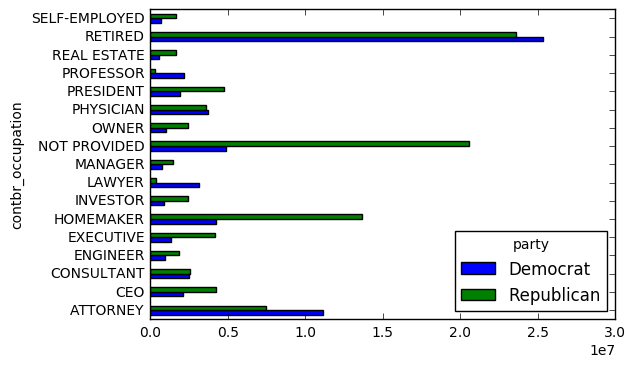

In [472]:
over_2mm.plot(kind='barh')

In [496]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
# Order totals by key in descending order
    return totals.sort_values(ascending=False)[-n:]

In [497]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  COMPUTER ASSISTANT                        3.0
               SPRINKLER FITTER FIRE PROTECTION SPECI    3.0
               ADMINISTRATION/INSTRUCTOR                 3.0
               LEAD UI/UX DEVELOPER                      3.0
               POLICY/ LAWYER                            3.0
               LAN/WAN ANALYST                           3.0
               SR MGR                                    3.0
Romney, Mitt   MD - UROLOGIST                            5.0
               DISTRICT REPRESENTATIVE                   5.0
               INDEPENDENT PROFESSIONAL                  3.0
               REMODELER & SEMI RETIRED                  3.0
               AFFORDABLE REAL ESTATE DEVELOPER          3.0
               IFC CONTRACTING SOLUTIONS                 3.0
               3RD GENERATION FAMILY BUSINESS OWNER      3.0
Name: contb_receipt_amt, dtype: float64

In [476]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


cand_nm        contbr_occupation                     
Obama, Barack  COMPUTER ASSISTANT                        3.0
               SPRINKLER FITTER FIRE PROTECTION SPECI    3.0
               ADMINISTRATION/INSTRUCTOR                 3.0
               LEAD UI/UX DEVELOPER                      3.0
               POLICY/ LAWYER                            3.0
               LAN/WAN ANALYST                           3.0
               SR MGR                                    3.0
Romney, Mitt   MD - UROLOGIST                            5.0
               DISTRICT REPRESENTATIVE                   5.0
               INDEPENDENT PROFESSIONAL                  3.0
               REMODELER & SEMI RETIRED                  3.0
               AFFORDABLE REAL ESTATE DEVELOPER          3.0
               IFC CONTRACTING SOLUTIONS                 3.0
               3RD GENERATION FAMILY BUSINESS OWNER      3.0
Name: contb_receipt_amt, dtype: float64

In [475]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


cand_nm        contbr_employer                   
Obama, Barack  SOLIYA                                3.0
               CARR ENTERPRISES                      3.0
               PENN STATE DICKINSON SCHOOL OF LAW    3.0
               CADUCEUS OCCUPATIONAL MEDICINE        3.0
               N.A.                                  3.0
               REAL ENERGY CONSULTING SERVICES       3.0
               JPDSYSTEMS, LLC                       3.0
               CASS REGIONAL MED. CENTER             2.5
               ARCON CORP                            2.0
               THE VICTORIA GROUP, INC.              2.0
Romney, Mitt   EASTHAM CAPITAL                       5.0
               GREGORY GALLIVAN                      5.0
               DIRECT LENDERS LLC                    5.0
               LOUGH INVESTMENT ADVISORY LLC         4.0
               WATERWORKS INDUSRTIES                 3.0
               WILL MERRIFIELD                       3.0
               HONOLD COMMUNICTAIONS  

### Bucketing donation amounts

In [503]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
bins

array([       0,        1,       10,      100,     1000,    10000,
         100000,  1000000, 10000000])

In [504]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [510]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.describe()

                                       contb_receipt_amt       file_num
cand_nm       contb_receipt_amt                                        
Obama, Barack (0, 1]            count         493.000000     493.000000
                                mean            0.645517  777624.318458
                                std             0.429542    8440.209237
                                min             0.010000  756214.000000
                                25%             0.010000  772372.000000
                                50%             1.000000  775668.000000
                                75%             1.000000  785239.000000
                                max             1.000000  787803.000000
              (1, 10]           count       40070.000000   40070.000000
                                mean            8.416961  776787.001223
                                std             2.558799    9841.969868
                                min             1.010000  756214

In [513]:
grouped.size().unstack(0)

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                       493.0          77.0
(1, 10]                    40070.0        3681.0
(10, 100]                 372280.0       31853.0
(100, 1000]               153991.0       43357.0
(1000, 10000]              22284.0       26186.0
(10000, 100000]                2.0           1.0
(100000, 1000000]              3.0           NaN
(1000000, 10000000]            4.0           NaN

In [514]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                      318.24         77.00
(1, 10]                  337267.62      29819.66
(10, 100]              20288981.41    1987783.76
(100, 1000]            54798531.46   22363381.69
(1000, 10000]          51753705.67   63942145.42
(10000, 100000]           59100.00      12700.00
(100000, 1000000]       1490683.08           NaN
(1000000, 10000000]     7148839.76           NaN

In [515]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                    0.805182      0.194818
(1, 10]                   0.918767      0.081233
(10, 100]                 0.910769      0.089231
(100, 1000]               0.710176      0.289824
(1000, 10000]             0.447326      0.552674
(10000, 100000]           0.823120      0.176880
(100000, 1000000]         1.000000           NaN
(1000000, 10000000]       1.000000           NaN

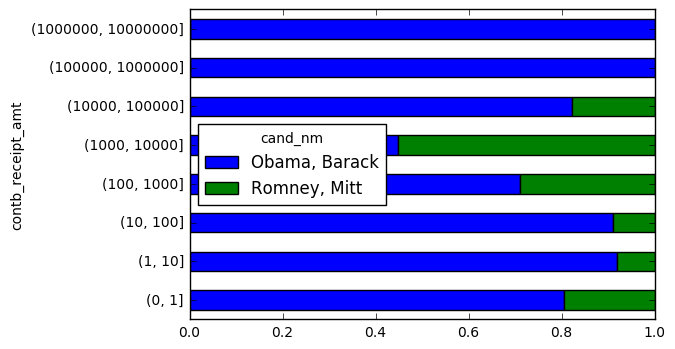

In [517]:
normed_sums[:-2].plot(kind='barh', stacked=True)

### Donation statistics by state

In [519]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AA              56405.00        135.00
AB               2048.00          0.00
AE              42973.75       5680.00
AK             281840.15      86204.24
AL             543123.48     527303.51
AP              37130.50       1655.00
AR             359247.28     105556.00
AS               2955.00          0.00
AZ            1506476.98    1888436.23
CA           23824984.24   11237636.60
CO            2132429.49    1506714.12
CT            2068291.26    3499475.45
DC            4373538.80    1025137.50
DE             336669.14      82712.00
FF                  0.00      99030.00
FL            7318178.58    8338458.81
FM                600.00          0.00
GA            2786399.49    1995725.59
GU              11581.50       3850.00
HI             795212.64     111763.00
IA             584829.10     208537.49
ID             197538.06     787158.44
IL           16443895.84    3628571.53
IN             883691.81 

In [521]:
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK             281840.15      86204.24
AL             543123.48     527303.51
AR             359247.28     105556.00
AZ            1506476.98    1888436.23
CA           23824984.24   11237636.60
CO            2132429.49    1506714.12
CT            2068291.26    3499475.45
DC            4373538.80    1025137.50
DE             336669.14      82712.00
FL            7318178.58    8338458.81

In [523]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK              0.765778      0.234222
AL              0.507390      0.492610
AR              0.772902      0.227098
AZ              0.443745      0.556255
CA              0.679498      0.320502
CO              0.585970      0.414030
CT              0.371476      0.628524
DC              0.810113      0.189887
DE              0.802776      0.197224
FL              0.467417      0.532583

In [528]:
%run test_main.py

__main__


NameError: name 'result' is not defined

In [531]:
a = 'foo'

In [534]:
getattr(a,'isalpha')

<function isalpha>

In [537]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError: #
        return False
            

In [539]:
isiterable('a string')

True

In [540]:
isiterable([1, 2, 3])

True

In [542]:
isiterable(5)

False

In [545]:
x = 'a string'
if not isinstance(x, list) and isiterable(x):
    x = list(x)
x

['a', ' ', 's', 't', 'r', 'i', 'n', 'g']

In [554]:
3^0

3

In [556]:
cval = 1+2j

In [559]:
type(cval)

complex

In [562]:
template = '%.2f %s are worth $%d'

In [564]:
template % (4.5560, 'Argentine Pesos', 1)

'4.56 Argentine Pesos are worth $1'

In [566]:
bool([]), bool([1, 2, 3])

(False, True)

In [567]:
from datetime import datetime, date, time

In [598]:
dt1 = datetime(2016,12,12,20,9,56)

In [570]:
dt

datetime.datetime(2016, 12, 12, 20, 9, 56)

In [571]:
dt.date()

datetime.date(2016, 12, 12)

In [583]:
dt.time()

datetime.time(20, 9, 56)

In [584]:
dt

datetime.datetime(2016, 12, 12, 20, 9, 56)

In [589]:
dt.strftime('%m/%d/%Y %H:%M:%S')

'12/12/2016 20:09:56'

In [596]:
dt2 = datetime.strptime('12/12/2016 20:09:56', '%d/%m/%Y %H:%M:%S')

In [595]:
datetime.strptime('20091031', '%Y%m%d')

datetime.datetime(2009, 10, 31, 0, 0)

In [602]:
delta_t = dt2 - dt1
delta_t + dt1

datetime.datetime(2016, 12, 12, 20, 9, 56)

In [604]:
tup = 4, 5, 6

In [611]:
3 in tuple([3,4,5])

True

In [621]:
import bisect
c = [1, 2, 5, 2, 3, 4, 2,7]
bisect.bisect(c, 3)

7

In [626]:
(7, 2, 3, 6, 3, 5, 6, 0, 1)[::-2]

(1, 6, 3, 3, 7)

In [631]:
sorted('this is just some string')

[' ',
 ' ',
 ' ',
 ' ',
 'e',
 'g',
 'h',
 'i',
 'i',
 'i',
 'j',
 'm',
 'n',
 'o',
 'r',
 's',
 's',
 's',
 's',
 's',
 't',
 't',
 't',
 'u']

In [633]:
set('this is just some string')

{' ', 'e', 'g', 'h', 'i', 'j', 'm', 'n', 'o', 'r', 's', 't', 'u'}

In [634]:
pitchers = [('Nolan', 'Ryan'), ('Roger', 'Clemens'),('Schilling', 'Curt')]

In [646]:
zip(*pitchers)

[('Nolan', 'Roger', 'Schilling'), ('Ryan', 'Clemens', 'Curt')]

In [647]:
a = ['x','b','c']

zip(a)

[('x',), ('b',), ('c',)]

In [651]:
reversed(range(10))


In [656]:
by_letter = {}
words = ['apple', 'bat', 'bar', 'atom', 'book']
for word in words:
    letter = word[0]
    if letter not in by_letter:
        by_letter[letter] = [word]
    else:
        by_letter[letter].append(word)
by_letter

{'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']}

In [661]:
by_letter = {}
words = ['apple', 'bat', 'bar', 'atom', 'book']
for word in words:
    letter = word[0]
    by_letter.setdefault(letter,[]).append(word)
by_letter

{'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']}

In [676]:
from collections import defaultdict
counts = defaultdict(lambda: 4)
counts['key']
counts

defaultdict(<function __main__.<lambda>>, {'key': 4})

In [680]:
from collections import defaultdict
by_letter = defaultdict(list)

by_letter['key']
by_letter

defaultdict(list, {'key': []})

In [683]:
type({2, 2, 2, 1, 3, 3})

set

In [685]:
set([1,2,3])

{1, 2, 3}

In [689]:
a = {1, 2, 3, 4, 5}
b = {3, 4, 5, 6, 7, 8}
a|b

{1, 2, 3, 4, 5, 6, 7, 8}

In [692]:
some_tuples = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
flattened = [x for tup in some_tuples for x in tup]
flattened

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [701]:
flattened = []
for tup in some_tuples:
    x_x = [x for x in tup]
    flattened.extend(x_x)
flattened


[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [704]:
flattened = []
flattened = [[x for x in tup] for tup in some_tuples]
flattened

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [729]:
def g():
    a = 5
    b = 6
    c = 7
    return {'a' : a, 'b' : b, 'c' : c}

In [733]:
a, b, c= g()

In [739]:
states = [' Alabama ', 'Georgia!', 'Georgia', 'georgia', 'FlOrIda',
'south carolina##', 'West virginia?']

In [742]:
for value in states:
    print value

 Alabama 
Georgia!
Georgia
georgia
FlOrIda
south carolina##
West virginia?


In [747]:
def make_closure(a):
    def closure():
        print('I know the secret: %d' % a)
    return closure



In [749]:
make_closure(5)

<function __main__.closure>